In [2]:
#Importing the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

/home/ladiyusuph/anaconda3/envs/boston_price_pred/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [19]:
#Loading the dataset
house_price = sklearn.datasets.fetch_california_housing(as_frame = True)
house_price

{'data':        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 ...       ...       ...       ...        ...         ...       ...       ...   
 20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
 20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
 20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
 20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
 20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   
 
        Longitude 

## Exploratory Data Analysis

In [20]:
#Loading the data into a dataframe
house_price_df = pd.DataFrame(house_price.data, columns = house_price.feature_names)
house_price_df.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [23]:
#Adding the target values to the df
house_price_df['price'] = house_price.target
house_price_df.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [12]:
#Viewing the shape of the dataframe
house_price_df.shape

(20640, 9)

In [13]:
#Checking for missing Values
house_price_df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

In [15]:
#Viewing the statistical summary of the df
house_price_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
price,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


In [17]:
#Finding the correlation between the various variables in the dataset
house_price_df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


[Text(0.5, 0, 'MedInc'),
 Text(1.5, 0, 'HouseAge'),
 Text(2.5, 0, 'AveRooms'),
 Text(3.5, 0, 'AveBedrms'),
 Text(4.5, 0, 'Population'),
 Text(5.5, 0, 'AveOccup'),
 Text(6.5, 0, 'Latitude'),
 Text(7.5, 0, 'Longitude'),
 Text(8.5, 0, 'price')]

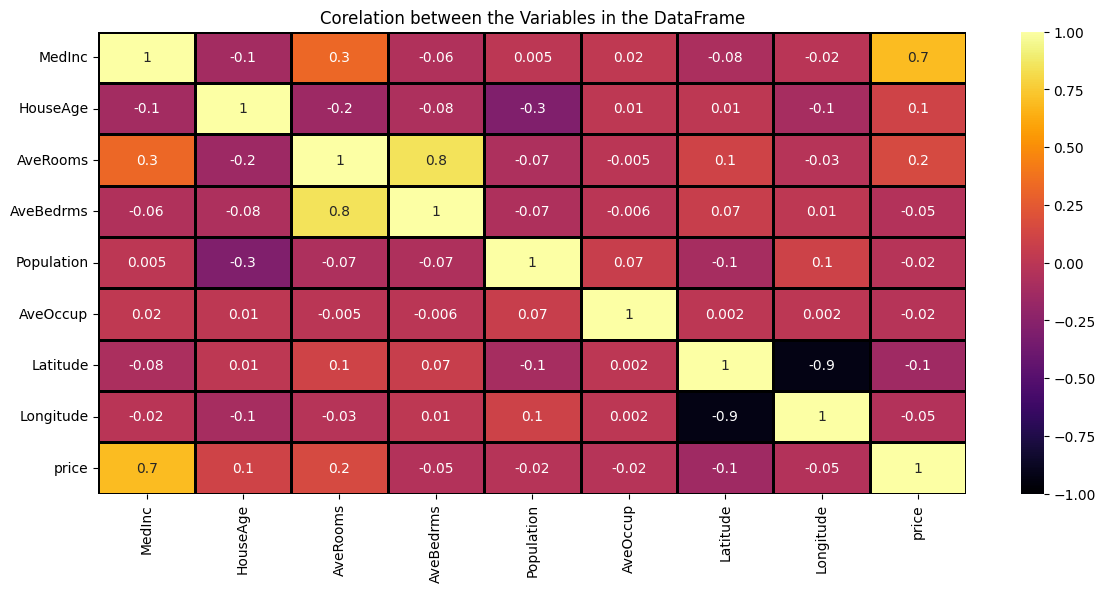

In [18]:
#Visualize the correlation 
corr_df = house_price_df.corr(method = 'pearson')
plt.figure(figsize = (14,6))
heatmap = sns.heatmap(corr_df, annot = True, fmt = '.1g', vmin = -1, vmax = 1, center = 0, cmap = 'inferno', linewidths = 1, linecolor = 'Black')
heatmap.set_title('Corelation between the Variables in the DataFrame')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation= 90)

As Expected the Price of Houses and Median block income is possitively correlated, the higher the income of the people in an area is the higher the prices of the houses in that area

In [25]:
#Splitting the data 
X = house_price_df.drop(columns = 'price', axis = 1)
y = house_price_df.price

In [26]:
print(X.shape, y.shape)

(20640, 8) (20640,)


In [27]:
#Slitting the data into training and test data
SEED  = 1
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = SEED)

In [28]:
print(X.shape,X_test.shape,X_train.shape)
print(y.shape, y_train.shape,y_test.shape)

(20640, 8) (5160, 8) (15480, 8)
(20640,) (15480,) (5160,)


## Model Building


#### XGBoost Regressor

In [29]:
#Iniatilizing the model
X_regressor = XGBRegressor()


In [30]:
#Fitting the model 
X_regressor.fit(X_train,y_train)

/home/ladiyusuph/anaconda3/envs/boston_price_pred/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

#### Making Predictions

In [37]:
y_train_pred = X_regressor.predict(X_train)
print(y_train_pred)

[1.0962296  0.86735404 2.0223215  ... 1.039312   1.2552898  1.4500481 ]


In [34]:
y_pred = X_regressor.predict(X_test)
print(y_pred)

[4.1909785  0.62799907 2.5191681  ... 0.76915354 2.4385426  1.408249  ]


#### Evaluation of the Model

In [39]:
#R Squared Error of the train Data
r2_error = metrics.r2_score(y_train,y_train_pred)

#Mean absolute Error the train Data
m_error = metrics.mean_absolute_error(y_train,y_train_pred)

print(f"The RSquaredError of the train data is: {r2_error}")
print(f"The MeanAbsoluteError of the train data is: {m_error}")


The RSquaredError of the train data is: 0.9465603571489998
The MeanAbsoluteError of the train data is: 0.19026131182904052


In [40]:
#R Squared Error of the test Data
r2_error = metrics.r2_score(y_test,y_pred)

#Mean absolute Error the test Data
m_error = metrics.mean_absolute_error(y_test,y_pred)

print(f"The RSquaredError of the test data is: {r2_error}")
print(f"The MeanAbsoluteError of the test data is: {m_error}")


The RSquaredError of the test data is: 0.8281873586718176
The MeanAbsoluteError of the test data is: 0.30957163379906033


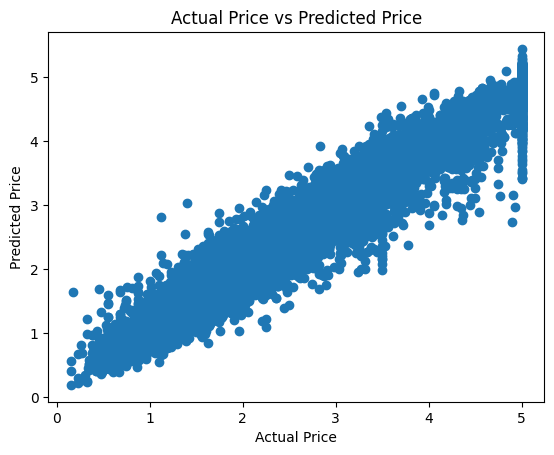

In [41]:
#Visualizing the original Prices and Predicted prices
plt.scatter(y_train, y_train_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()